## Handwritten digit recognition MNIST dataset

The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains 60,000 images each 28x28 pixels of handwritten digits with correct labels. There are additional 10,000 images of test set. 

**What we will learn?**
- Nearest neighbor (NN) algorithm of classification
- Various distance functions
- K-nearest neighbors (KNN)
- Principle component analysis (PCA)

In [1]:
import io, gzip 
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# load images
def mnist_images(url):  
    with gzip.open(io.BytesIO(urlopen(url).read()), 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
        # consult http://yann.lecun.com/exdb/mnist/ for details 
    data = data.reshape(-1,784)
    return data/256  # we are using int8, squared distance could be large

# load image labels
def mnist_labels(url):        
    with gzip.open(io.BytesIO(urlopen(url).read()), 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# plot/view a specific image
def mnist_view(im):
    plt.axis('off')
    plt.imshow(im.reshape((28,28)), cmap=plt.cm.gray, origin='upper')
    plt.show()
    return

# calculate squared distance
def dist(x1, x2):
    return np.sum(np.square(x1-x2))

# find nearest neighbor 
def find_nn(x):
    dist_vec = [dist(x, train_data[i,]) for i in range(len(train_labels))]
    print("Index: ", np.argmin(dist_vec))
    return train_labels[np.argmin(dist_vec)]

In [3]:
train_data = mnist_images('https://pranabdas.github.io/drive/datasets/mnist-handwritten-digits/train-images-idx3-ubyte.gz')
test_data    = mnist_images('https://pranabdas.github.io/drive/datasets/mnist-handwritten-digits/t10k-images-idx3-ubyte.gz')
train_labels = mnist_labels('https://pranabdas.github.io/drive/datasets/mnist-handwritten-digits/train-labels-idx1-ubyte.gz')
test_labels  = mnist_labels('https://pranabdas.github.io/drive/datasets/mnist-handwritten-digits/t10k-labels-idx1-ubyte.gz')

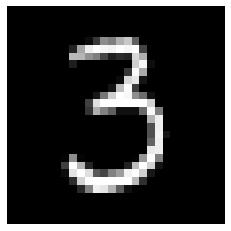

In [4]:
# view a sample data
mnist_view(train_data[50,:]);

In [5]:
# print the corresponding label 
print("Label:", train_labels[50])

Label: 3


In [6]:
find_nn(test_data[100, :])

Index:  57158


6

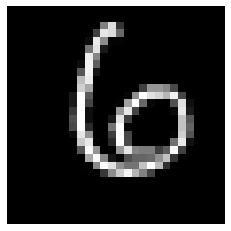

In [7]:
mnist_view(test_data[100, :])

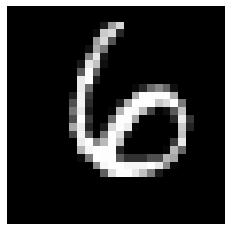

In [8]:
mnist_view(train_data[57158, ])

Notice that in oder to find nearest neighbors we need to go through each training data point. There are better search algorithms to look for nearest neighbors quickly. We can use scikit learn, there are KDTree and BallTree.

In [11]:
from sklearn.neighbors import BallTree, KDTree

ball_tree = BallTree(train_data)
kd_tree = KDTree(train_data)

In [12]:
train_labels[ball_tree.query(test_data[100, :].reshape(1, -1), \
                             k=1, return_distance=False)[0][0]]

6

In [13]:
train_labels[kd_tree.query(test_data[100, :].reshape(1, -1), k=1, \
                           return_distance=False)[0][0]]

6

Above two sklearn and our own algorithm would produce same result, but time to find the nearest neighbor is faster in case of KDTree and BallTree.

In [38]:
# Let's calculate the precision of nearest neighbor algorithm

result = [train_labels[ball_tree.query(test_data[i, :].reshape(1, -1), k=1, \
         return_distance=False)[0][0]] for i in range(len(test_labels))]

In [39]:
correct_result = np.equal(result, test_labels)
success = float(np.sum(correct_result))/len(test_labels)
print('Success =', success*100, '%')

Success = 96.91 %


In [32]:
# np.savetxt('mnist_test_images.gz', test_data, fmt='%d')
# tst_l = np.loadtxt('mnist_test_labels.gz')